Starting preprocessing...
First few rows of the dataset:
       date  cloud_cover  sunshine  global_radiation  max_temp  mean_temp  \
0  19790101          2.0       7.0              52.0       2.3       -4.1   
1  19790102          6.0       1.7              27.0       1.6       -2.6   
2  19790103          5.0       0.0              13.0       1.3       -2.8   
3  19790104          8.0       0.0              13.0      -0.3       -2.6   
4  19790105          6.0       2.0              29.0       5.6       -0.8   

   min_temp  precipitation  pressure  snow_depth  
0      -7.5            0.4  101900.0         9.0  
1      -7.5            0.0  102530.0         8.0  
2      -7.2            0.0  102050.0         4.0  
3      -6.5            0.0  100840.0         2.0  
4      -1.4            0.0  102250.0         1.0  

Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtyp

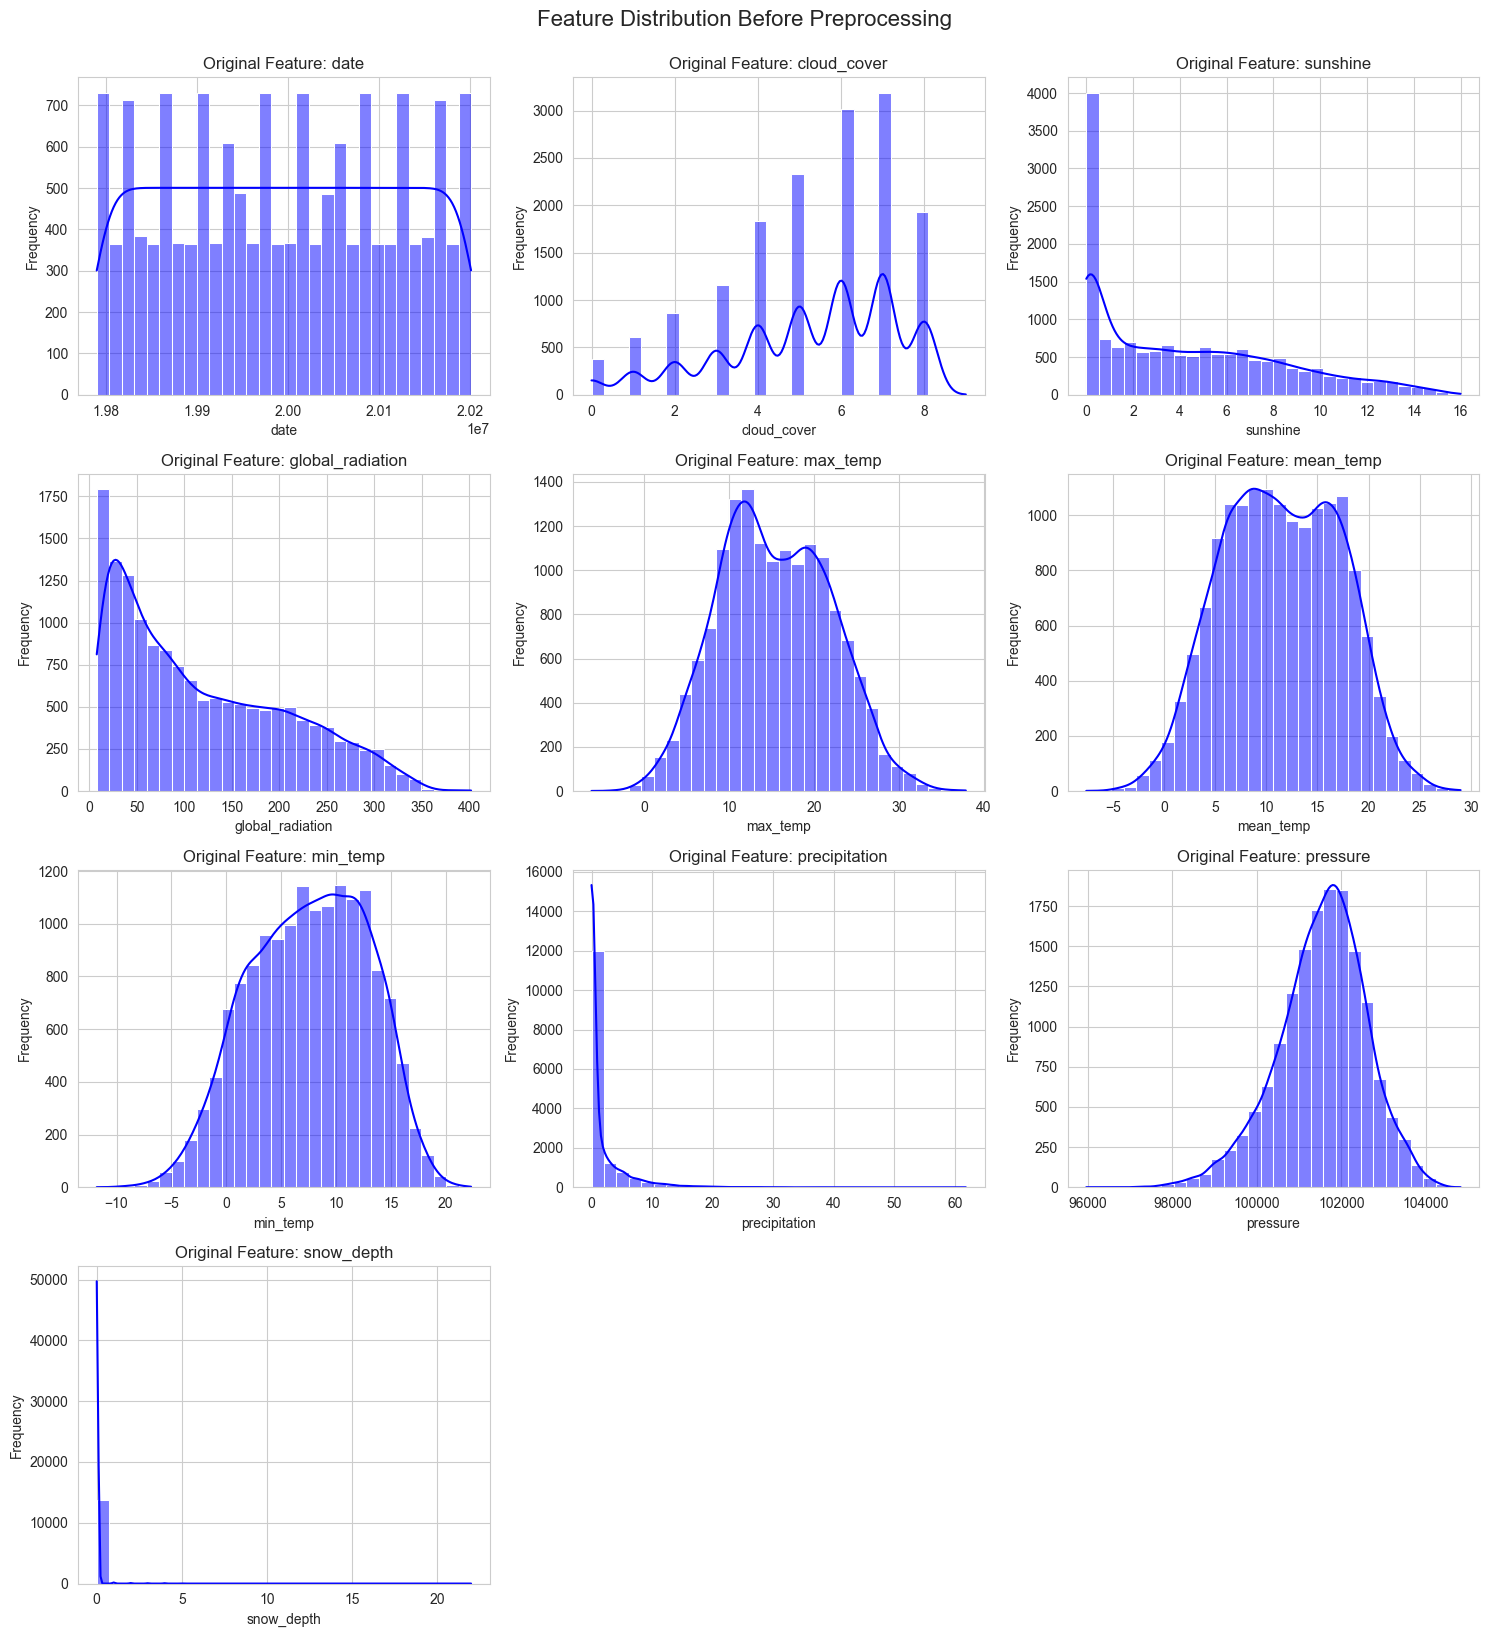

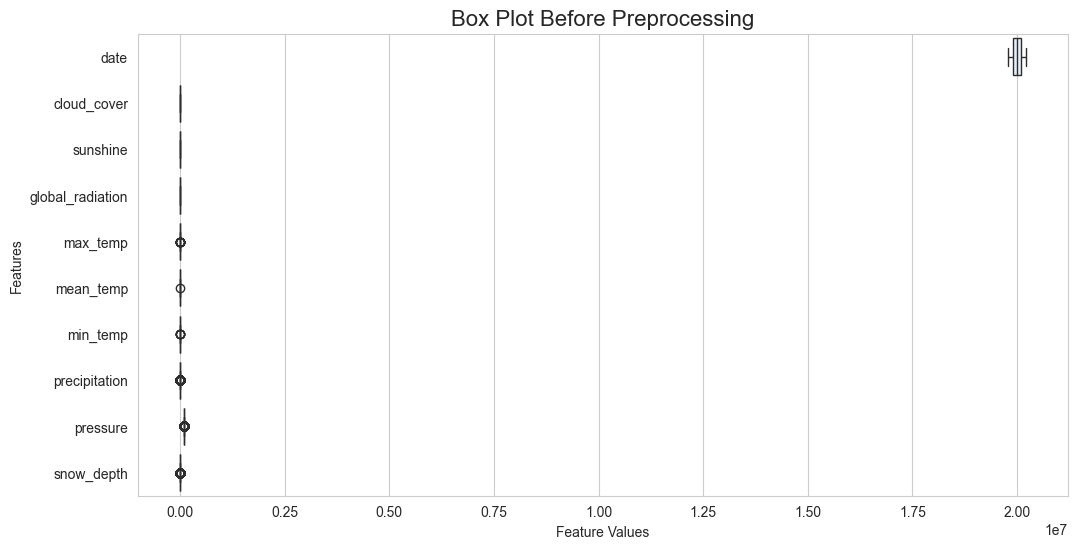

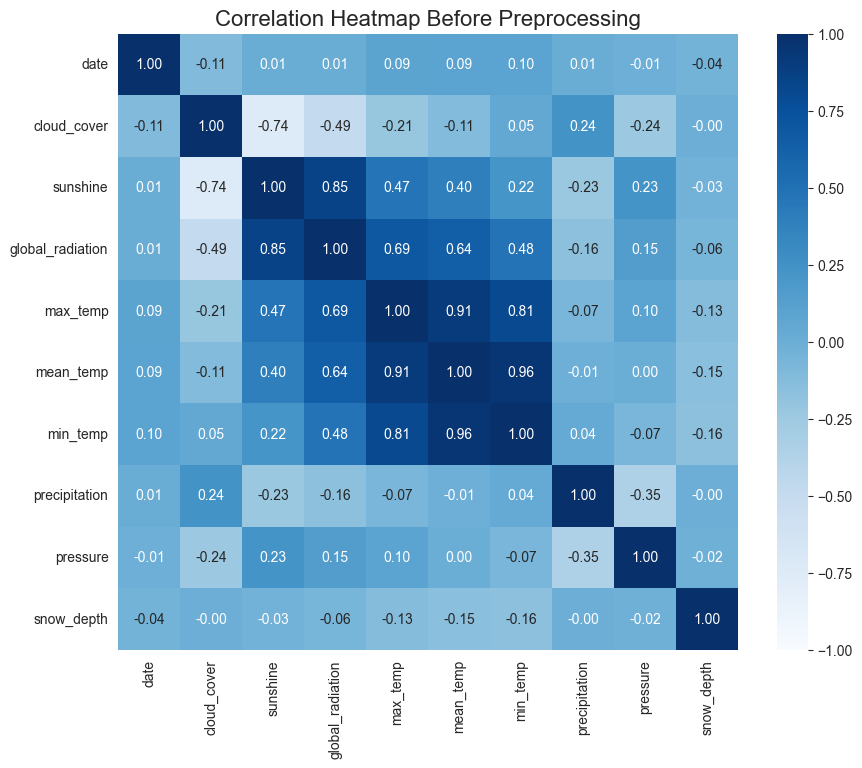


Missing values after filling:
date                0
cloud_cover         0
sunshine            0
global_radiation    0
max_temp            0
mean_temp           0
min_temp            0
precipitation       0
pressure            0
snow_depth          0
dtype: int64


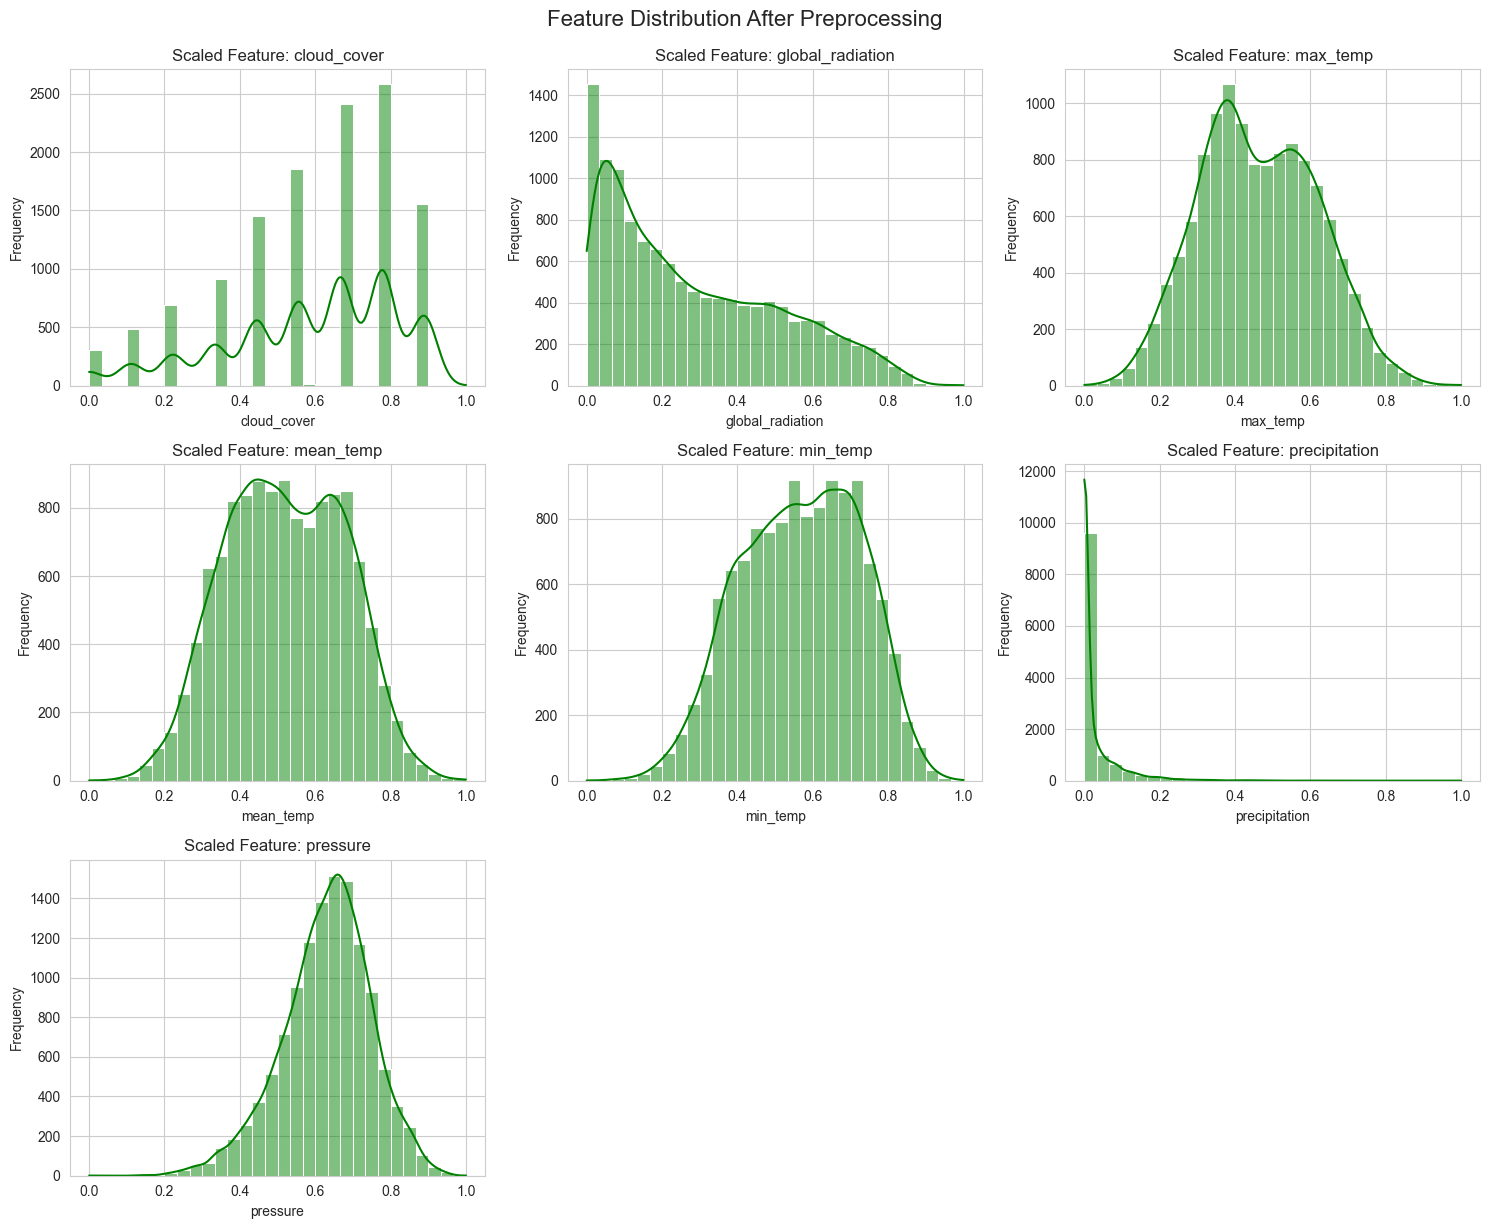

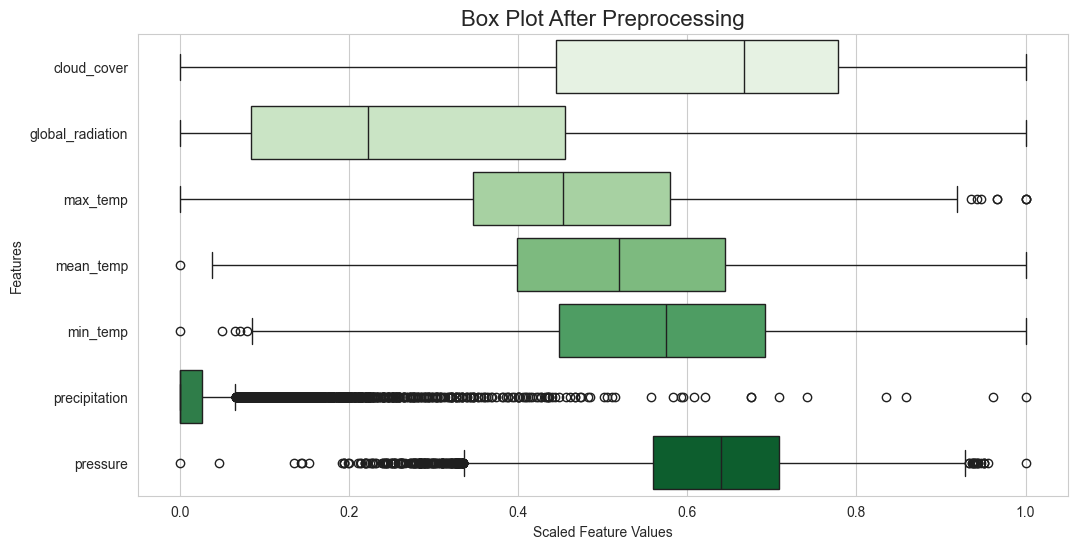

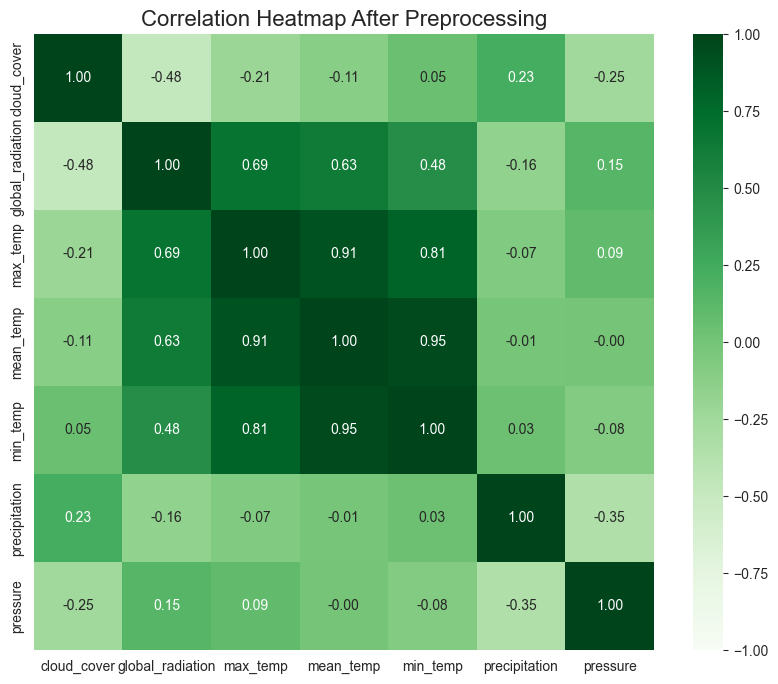

Preprocessing completed.


In [15]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# For Jupyter Notebook, ensure plots display inline
%matplotlib inline

def preprocess_data():
    # Load the dataset
    data = pd.read_csv('/Users/university/Desktop/dimpy/london_weather 1.csv')

    # Display the first few rows
    print("First few rows of the dataset:")
    print(data.head())

    # General information about the dataset
    print("\nDataset information:")
    data.info()

    # Check for missing values
    print("\nMissing values in each column:")
    print(data.isnull().sum())

    # Basic statistics
    print("\nStatistical summary:")
    print(data.describe())

    # Visualizations before preprocessing
    sns.set_style('whitegrid')

    # 1. Histograms before preprocessing
    def plot_histograms(data):
        num_features = data.shape[1]
        num_cols = 3
        num_rows = math.ceil(num_features / num_cols)
        plt.figure(figsize=(5 * num_cols, 4 * num_rows))
        data_columns = data.columns
        for i, column in enumerate(data_columns, 1):
            plt.subplot(num_rows, num_cols, i)
            sns.histplot(data[column], kde=True, color='blue', bins=30)
            plt.title(f"Original Feature: {column}")
            plt.xlabel(column)
            plt.ylabel("Frequency")
        plt.tight_layout()
        plt.suptitle("Feature Distribution Before Preprocessing", fontsize=16, y=1.02)
        plt.show()

    plot_histograms(data)

    # 2. Boxplots before preprocessing
    def plot_boxplots(data):
        plt.figure(figsize=(12, 6))
        sns.boxplot(data=data, orient='h', palette='Blues')
        plt.title("Box Plot Before Preprocessing", fontsize=16)
        plt.xlabel("Feature Values")
        plt.ylabel("Features")
        plt.show()

    plot_boxplots(data)

    # 3. Correlation heatmap before preprocessing
    def plot_correlation_heatmap(data):
        plt.figure(figsize=(10, 8))
        sns.heatmap(data.corr(), annot=True, cmap='Blues', fmt=".2f", vmin=-1, vmax=1)
        plt.title("Correlation Heatmap Before Preprocessing", fontsize=16)
        plt.show()

    plot_correlation_heatmap(data)

    # Fill missing values with the mean
    data.fillna(data.mean(), inplace=True)

    # Verify no missing values remain
    print("\nMissing values after filling:")
    print(data.isnull().sum())

    # Drop the 'snow_depth' column due to low correlation
    data.drop(columns=['snow_depth'], inplace=True)

    # Define features (X) and target variable (y)
    X = data[['cloud_cover', 'global_radiation', 'max_temp', 'mean_temp',
              'min_temp', 'precipitation', 'pressure']]
    y = data['sunshine']

    # Shift y by 2 days to predict future sunshine
    y = y.shift(-2)

    # Drop the last two rows as they will have NaN values after shifting
    X = X[:-2]
    y = y[:-2]

    # Split into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize the scaler
    scaler = MinMaxScaler()

    # Fit the scaler on the training data and transform
    X_train_scaled = scaler.fit_transform(X_train)

    # Transform the test data using the same scaler
    X_test_scaled = scaler.transform(X_test)

    # Convert scaled features back to DataFrame for plotting
    X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)

    # Visualizations after preprocessing
    # 1. Histograms after preprocessing
    def plot_scaled_histograms(scaled_data):
        num_features = scaled_data.shape[1]
        num_cols = 3
        num_rows = math.ceil(num_features / num_cols)
        plt.figure(figsize=(5 * num_cols, 4 * num_rows))
        data_columns = scaled_data.columns
        for i, column in enumerate(data_columns, 1):
            plt.subplot(num_rows, num_cols, i)
            sns.histplot(scaled_data[column], kde=True, color='green', bins=30)
            plt.title(f"Scaled Feature: {column}")
            plt.xlabel(column)
            plt.ylabel("Frequency")
        plt.tight_layout()
        plt.suptitle("Feature Distribution After Preprocessing", fontsize=16, y=1.02)
        plt.show()

    plot_scaled_histograms(X_train_scaled_df)

    # 2. Boxplots after preprocessing
    def plot_scaled_boxplots(scaled_data):
        plt.figure(figsize=(12, 6))
        sns.boxplot(data=scaled_data, orient='h', palette='Greens')
        plt.title("Box Plot After Preprocessing", fontsize=16)
        plt.xlabel("Scaled Feature Values")
        plt.ylabel("Features")
        plt.show()

    plot_scaled_boxplots(X_train_scaled_df)

    # 3. Correlation heatmap after preprocessing
    def plot_scaled_correlation_heatmap(scaled_data):
        plt.figure(figsize=(10, 8))
        sns.heatmap(scaled_data.corr(), annot=True, cmap='Greens', fmt=".2f", vmin=-1, vmax=1)
        plt.title("Correlation Heatmap After Preprocessing", fontsize=16)
        plt.show()

    plot_scaled_correlation_heatmap(X_train_scaled_df)

    return X_train_scaled, X_test_scaled, y_train, y_test, scaler

# Call the function
print("Starting preprocessing...")
X_train_scaled, X_test_scaled, y_train, y_test, scaler = preprocess_data()
print("Preprocessing completed.")
